In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('teen_phone_addiction_dataset.csv')

In [3]:
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [4]:
df.shape

(3000, 25)

In [5]:
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')

In [6]:
df.dtypes

ID                          int64
Name                       object
Age                         int64
Gender                     object
Location                   object
School_Grade               object
Daily_Usage_Hours         float64
Sleep_Hours               float64
Academic_Performance        int64
Social_Interactions         int64
Exercise_Hours            float64
Anxiety_Level               int64
Depression_Level            int64
Self_Esteem                 int64
Parental_Control            int64
Screen_Time_Before_Bed    float64
Phone_Checks_Per_Day        int64
Apps_Used_Daily             int64
Time_on_Social_Media      float64
Time_on_Gaming            float64
Time_on_Education         float64
Phone_Usage_Purpose        object
Family_Communication        int64
Weekend_Usage_Hours       float64
Addiction_Level           float64
dtype: object

In [7]:
df['Addiction_Level'].max()

10.0

In [8]:
df['Addiction_Level'].min()

1.0

In [9]:
df_object = df.select_dtypes(include=['object'])
print(df_object.columns)

Index(['Name', 'Gender', 'Location', 'School_Grade', 'Phone_Usage_Purpose'], dtype='object')


In [10]:
df.isna().sum()

ID                        0
Name                      0
Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Social_Interactions       0
Exercise_Hours            0
Anxiety_Level             0
Depression_Level          0
Self_Esteem               0
Parental_Control          0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Apps_Used_Daily           0
Time_on_Social_Media      0
Time_on_Gaming            0
Time_on_Education         0
Phone_Usage_Purpose       0
Family_Communication      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df = pd.read_csv('cleaned_balanced_dataset.csv')

In [16]:
numeric_cols = df.select_dtypes(include = np.number)


In [13]:
cat_cols = df.select_dtypes(include=np.object_)
cat_cols.columns

Index(['Name', 'Gender', 'Location', 'School_Grade', 'Phone_Usage_Purpose'], dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object']).columns  
df_encoded = df[cat_cols].copy()

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    encoders[col] = le 

print(df_encoded.head())

   Name  Gender  Location  School_Grade  Phone_Usage_Purpose
0   117       1      1133             1                    0
1   951       1       453             5                    2
2  1200       2       645             0                    4
3   222       2       723             2                    2
4   964       1        16             2                    4


In [15]:
#df_decoded = df_encoded.copy()
#for col in cat_cols:
#   df_decoded[col] = encoders[col].inverse_transform(df_encoded[col])

# print(df_decoded.head())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd


X_num = numeric_cols


vif_data = pd.DataFrame()
vif_data['Feature'] = X_num.columns
vif_data['VIF'] = [variance_inflation_factor(X_num.values, i)
                   for i in range(X_num.shape[1])]

print(vif_data.sort_values('VIF', ascending=False))


                   Feature         VIF
19         Addiction_Level  117.241661
3              Sleep_Hours   48.181077
1                      Age   45.138167
2        Daily_Usage_Hours   31.905392
4     Academic_Performance   27.224997
13         Apps_Used_Daily   17.512984
14    Time_on_Social_Media   16.757436
18     Weekend_Usage_Hours   10.440719
12    Phone_Checks_Per_Day   10.133650
15          Time_on_Gaming    6.531985
8         Depression_Level    5.491972
11  Screen_Time_Before_Bed    5.316080
7            Anxiety_Level    5.022884
9              Self_Esteem    4.991205
17    Family_Communication    4.937560
0                       ID    4.768034
16       Time_on_Education    3.940012
5      Social_Interactions    3.754168
6           Exercise_Hours    3.229323
10        Parental_Control    2.044286


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

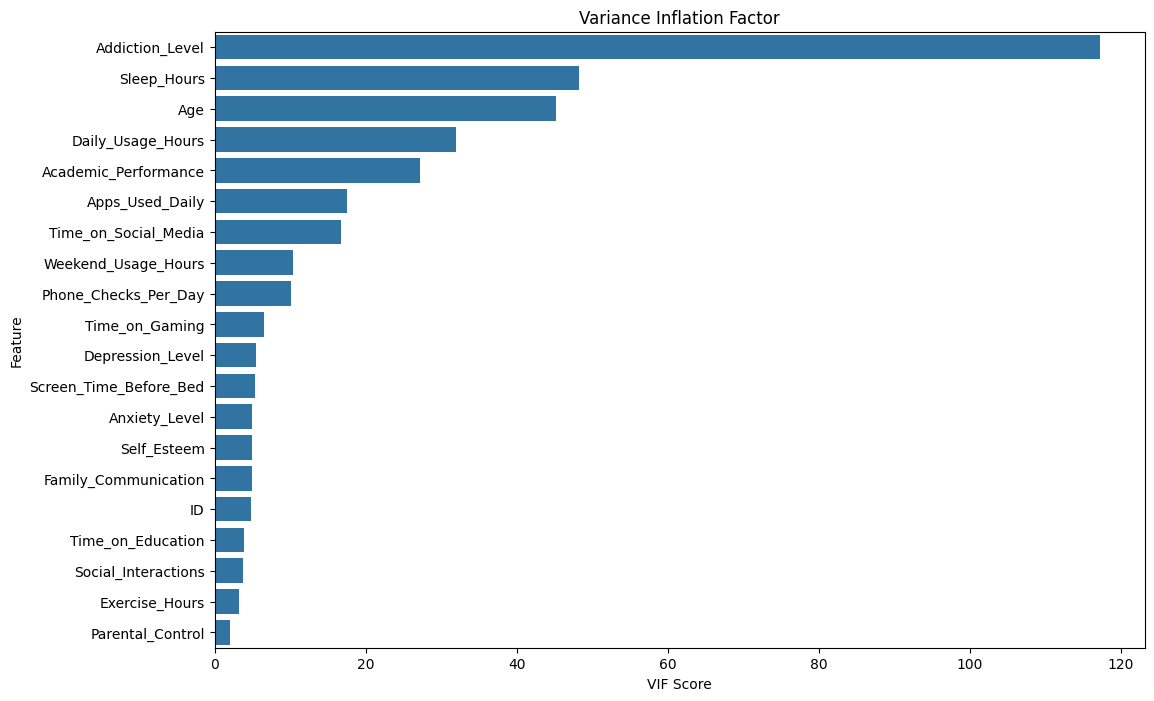

In [ ]:

plt.figure(figsize=(12, 8))
sns.barplot(data=vif_data.sort_values('VIF', ascending=False), x='VIF', y='Feature')
plt.title('Variance Inflation Factor')
plt.xlabel('VIF Score')
plt.ylabel('Feature')
plt.show()